# Get the data

In [1]:
import pandas as pd
train_set=pd.read_csv('anotherdataset/train.csv')
test_set=pd.read_csv('anotherdataset/test.csv')

d:\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
d:\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
#快速查看数据结构
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 探索性数据分析

In [3]:
import matplotlib.pyplot as plt
train_set.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

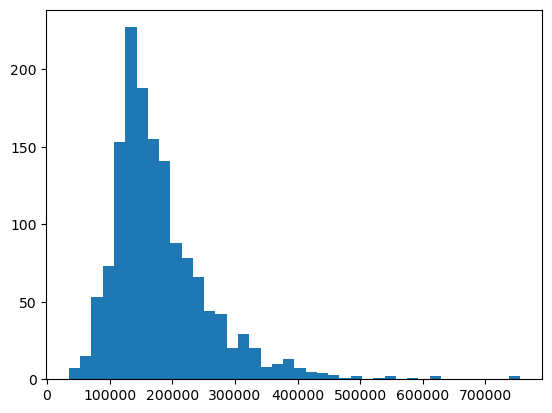

In [4]:
#价格分布
SalePrice=train_set['SalePrice'].values
plt.hist(SalePrice, bins=40)
plt.show()

In [5]:
train_set.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [6]:
#split dataset into categorical and numerical
train_set_cat = train_set.select_dtypes(include='object')
train_set_cat['SalePrice'] = train_set['SalePrice']
train_set_num = train_set.select_dtypes(include='number')
train_set_num['SalePrice'] = train_set['SalePrice']

In [7]:
#方差分析
from scipy.stats import f_oneway
def ANOVA(df, feature):
    category_groups = df.groupby(feature)['SalePrice'].apply(list)
    return f_oneway(*category_groups)

d:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
p_vals = {}
for col in train_set_cat.columns:
    p_vals[col] = ANOVA(train_set_cat, col).statistic
p_vals.pop('SalePrice')

d:\Anaconda\lib\site-packages\scipy\stats\stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


inf

In [9]:
#查看前十个影响因子
sorted(p_vals, key=p_vals.get, reverse=True)[:10]

['ExterQual',
 'KitchenQual',
 'BsmtQual',
 'GarageFinish',
 'Foundation',
 'CentralAir',
 'HeatingQC',
 'Neighborhood',
 'GarageType',
 'BsmtExposure']

In [11]:
#皮尔逊相关系数
corr = train_set_num.corr(method='pearson')
corr = corr.SalePrice.apply(abs).to_dict()
corr.pop('SalePrice')
sorted(corr, key=corr.get, reverse=True)[:10]

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

In [20]:
features = [
'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'ExterQual',
 'KitchenQual',
 'BsmtQual',
 'GarageFinish',
 'Foundation',
 'CentralAir',
 'HeatingQC',
 'Neighborhood',
 'GarageType',
 'BsmtExposure']
train_set[features].head(5)

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,ExterQual,KitchenQual,BsmtQual,GarageFinish,Foundation,CentralAir,HeatingQC,Neighborhood,GarageType,BsmtExposure
0,7,1710,2,548,856,856,2,8,2003,2003,Gd,Gd,Gd,RFn,PConc,Y,Ex,CollgCr,Attchd,No
1,6,1262,2,460,1262,1262,2,6,1976,1976,TA,TA,Gd,RFn,CBlock,Y,Ex,Veenker,Attchd,Gd
2,7,1786,2,608,920,920,2,6,2001,2002,Gd,Gd,Gd,RFn,PConc,Y,Ex,CollgCr,Attchd,Mn
3,7,1717,3,642,756,961,1,7,1915,1970,TA,Gd,TA,Unf,BrkTil,Y,Gd,Crawfor,Detchd,No
4,8,2198,3,836,1145,1145,2,9,2000,2000,Gd,Gd,Gd,RFn,PConc,Y,Ex,NoRidge,Attchd,Av


# 数据预处理

In [21]:
from sklearn.model_selection import  train_test_split
X = train_set[features].loc[:, train_set[features].columns != "SalePrice"]
y = train_set['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
#标准化数据
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalizedVars = scaler.fit_transform(X_train[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']])
normalizedVars_df = pd.DataFrame(normalizedVars, columns=scaler.get_feature_names_out())
normalizedVars_df.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,0.637073,-0.051643,0.293831,-0.192617,0.642893,0.862092,0.772872,0.268177,1.107889,1.020374
1,-0.094926,-0.421692,0.293831,0.030695,-0.046799,0.357895,-1.062909,-0.963076,0.094543,0.682585
2,-0.094926,-0.518474,-1.069494,-0.938576,-1.128667,-1.221922,-1.062909,-0.347450,-1.049557,-1.681937
3,-0.826925,-0.207253,-1.069494,-0.910068,-0.186540,0.650071,-1.062909,-0.347450,-0.363097,-0.330782
4,-0.094926,-0.169300,-1.069494,-0.838798,0.859266,0.701784,-1.062909,0.268177,-0.428474,-1.295893


In [23]:
#独热编码
from sklearn.preprocessing import OneHotEncoder 
enc = OneHotEncoder(handle_unknown='ignore')
categoricalVars = enc.fit_transform(X_train[['ExterQual', 'KitchenQual', 'BsmtQual', 'GarageFinish', 'Foundation','CentralAir', 'HeatingQC','Neighborhood','GarageType','BsmtExposure']]).toarray()
categoricalVars_df = pd.DataFrame(categoricalVars, columns=enc.get_feature_names_out())
categoricalVars_df.head()

,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_Ex,BsmtQual_Fa,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_nan
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
#合并数据
X_train_cleaned = pd.concat([categoricalVars_df, normalizedVars_df], axis='columns')
X_train_cleaned.head()

,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_Ex,BsmtQual_Fa,...,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.637073,-0.051643,0.293831,-0.192617,0.642893,0.862092,0.772872,0.268177,1.107889,1.020374
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.094926,-0.421692,0.293831,0.030695,-0.046799,0.357895,-1.062909,-0.963076,0.094543,0.682585
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.094926,-0.518474,-1.069494,-0.938576,-1.128667,-1.221922,-1.062909,-0.347450,-1.049557,-1.681937
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.826925,-0.207253,-1.069494,-0.910068,-0.186540,0.650071,-1.062909,-0.347450,-0.363097,-0.330782
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.094926,-0.169300,-1.069494,-0.838798,0.859266,0.701784,-1.062909,0.268177,-0.428474,-1.295893


In [25]:
#按一样的步骤操作测试集
X_test_categorical = enc.transform(X_test[['ExterQual', 'KitchenQual', 'BsmtQual', 'GarageFinish', 'Foundation','CentralAir','HeatingQC','Neighborhood','GarageType','BsmtExposure']]).toarray()
X_test_categorical_df = pd.DataFrame(X_test_categorical, columns = enc.get_feature_names_out())
X_test_normalized = scaler.transform(X_test[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']])
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=scaler.get_feature_names_out())
X_test_cleaned = pd.concat([X_test_categorical_df, X_test_normalized_df], axis='columns')
X_test_cleaned.head()

,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_Ex,BsmtQual_Fa,...,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.094926,-0.879035,-1.069494,-1.014597,-0.003975,-0.265240,-1.062909,-0.347450,-0.265031,0.875607
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.369073,2.069972,0.293831,1.113997,0.906598,0.851750,0.772872,1.499430,0.748315,0.489563
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.826925,-0.954942,0.293831,-0.558469,-0.118923,-0.368665,-1.062909,-0.963076,-1.441820,-1.681937
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.094926,0.251987,0.293831,-0.273390,-0.127939,-0.430720,0.772872,0.268177,-0.788049,-1.681937
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,2.101072,0.168489,1.657155,2.064262,1.260459,1.162025,0.772872,-0.347450,1.173266,1.116885


# 模型训练

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()
lin_reg.fit(X_train_cleaned, y_train)
y_pred_train = lin_reg.predict(X_train_cleaned)
y_pred_test = lin_reg.predict(X_test_cleaned)
print('Train RMSE:', mean_squared_error(y_train, y_pred_train, squared=False))
print('Test RMSE:', mean_squared_error(y_test, y_pred_test, squared=False))

Train RMSE: 30896.341432863424
Test RMSE: 2.802399837836868e+16


# 预测房价

In [27]:
test_features = [feature for feature in features if feature != 'SalePrice']
X_test_df = test_set[test_features]
X_test_categorical = enc.transform(X_test_df[['ExterQual', 'KitchenQual', 'BsmtQual', 'GarageFinish', 'Foundation','CentralAir','HeatingQC','Neighborhood','GarageType','BsmtExposure']]).toarray()
X_test_categorical_df = pd.DataFrame(X_test_categorical, columns = enc.get_feature_names_out())
X_test_normalized = scaler.transform(X_test_df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']])
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=scaler.get_feature_names_out())
X_test_cleaned = pd.concat([X_test_categorical_df, X_test_normalized_df], axis='columns')
X_test_cleaned

,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_Ex,BsmtQual_Fa,...,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.826925,-1.205437,-1.069494,1.199521,-0.402914,-0.709968,-1.062909,-0.963076,-0.330408,-1.151126
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.094926,-0.383738,-1.069494,-0.786533,0.604576,0.409608,-1.062909,-0.347450,-0.428474,-1.295893
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.826925,0.185568,0.293831,0.021192,-0.299235,-0.627228,0.772872,-0.347450,0.846381,0.634329
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.094926,0.138126,0.293831,-0.035824,-0.303742,-0.632399,0.772872,0.268177,0.879069,0.634329
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.369073,-0.476725,0.293831,0.135224,0.494136,0.282912,0.772872,-0.963076,0.682938,0.344796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-1.558925,-0.833490,-2.432818,-2.268947,-1.160222,-1.614937,-1.062909,-0.963076,-0.036211,-0.716826
1455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-1.558925,-0.833490,-1.069494,-0.910068,-1.160222,-1.614937,-1.062909,-0.347450,-0.036211,-0.716826
1456,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.826925,-0.582996,0.293831,0.467817,0.367918,0.138117,-1.062909,0.268177,-0.363097,0.537818
1457,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.826925,-1.065008,-2.432818,-2.268947,-0.335297,-0.518632,-1.062909,-0.347450,0.682938,0.344796


In [32]:
#处理缺失值
X_test_cleaned.isnull().sum().sum()
X_test_cleaned[X_test_cleaned['TotalBsmtSF'].isnull()]
X_test_cleaned[X_test_cleaned['GarageArea'].isnull()]
X_test_cleaned[X_test_cleaned['GarageCars'].isnull()]
X_test_cleaned = X_test_cleaned.fillna(0)

In [33]:
y_pred_lr = lin_reg.predict(X_test_cleaned)

In [34]:
final_df = pd.DataFrame()
final_df['Id'] = test_set['Id'].values
final_df['SalePrice'] = y_pred_lr
final_df.head(5)

,Id,SalePrice
0,1461,114112.0
1,1462,145856.0
2,1463,164416.0
3,1464,188416.0
4,1465,234432.0


In [36]:
#写入提交文件
final_df.to_csv('anotherdataset/submission.csv', index=False)